In [30]:
#Import required libraries 
from tensorflow import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library


In [31]:

#Reading data 
data = pd.read_csv("./data/Iris.csv")
print("Describing the data: ", data.describe())
print("Info of the data:", data.info())


Describing the data:         sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
mem

In [32]:

print("10 first samples of the dataset:",data.head(10))
print("10 last samples of the dataset:",data.tail(10))


10 first samples of the dataset:    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
10 last samples of the dataset:      sepal_length  sepal_width  petal_length  petal_width         species
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3

In [33]:

print(data["species"].unique())
data.loc[data["species"]=="Iris-setosa","species"]=0
data.loc[data["species"]=="Iris-versicolor","species"]=1
data.loc[data["species"]=="Iris-virginica","species"]=2
print(data.head())


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [34]:
data=data.iloc[np.random.permutation(len(data))]
print(data.head())

    sepal_length  sepal_width  petal_length  petal_width species
14           5.8          4.0           1.2          0.2       0
4            5.0          3.6           1.4          0.2       0
65           6.7          3.1           4.4          1.4       1
84           5.4          3.0           4.5          1.5       1
9            4.9          3.1           1.5          0.1       0


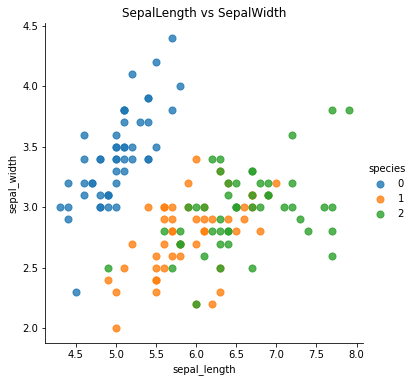

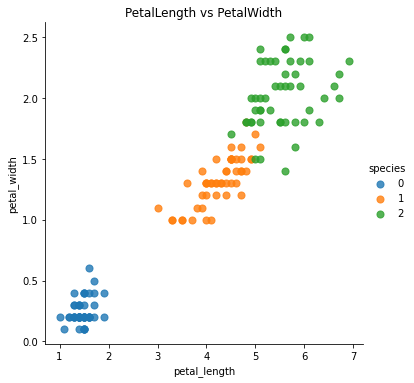

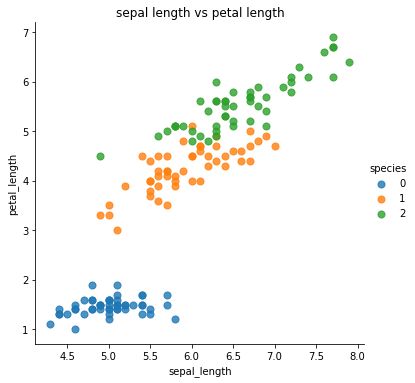

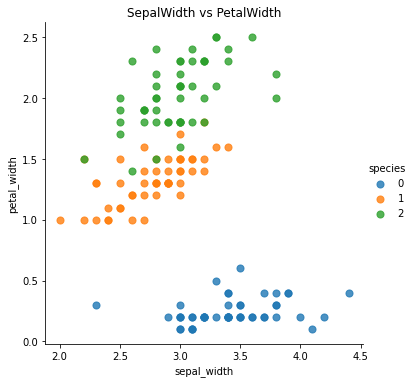

In [55]:
sns.lmplot(x='sepal_length',
  y='sepal_width',
  data=data,
  fit_reg=False,
  hue="species",
  scatter_kws={"marker": "D",
              "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot(x='petal_length',
  y='petal_width',
  data=data,
  fit_reg=False,
  hue="species",
  scatter_kws={"marker": "D",
              "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot(x='sepal_length',
  y='petal_length',
  data=data,
  fit_reg=False,
  hue="species",
  scatter_kws={"marker": "D",
              "s": 50})
plt.title('sepal length vs petal length')

sns.lmplot(x='sepal_width',
  y='petal_width',
  data=data,
  fit_reg=False,
  hue="species",
  scatter_kws={"marker": "D",
              "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

In [36]:
data=data.iloc[np.random.permutation(len(data))]


In [37]:
X=data.iloc[:,1:5].values


In [38]:
y=data.iloc[:,4].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[2.8 4.7 1.2 1]
 [3.0 5.5 2.1 2]
 [2.5 4.5 1.7 2]]
Examples of y
 [1 2 2]


In [39]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])


Examples of X_normalised
 [[0.07412052 0.09247741 0.06901797 0.06324555]
 [0.07941484 0.10821824 0.12078145 0.12649111]
 [0.06617903 0.0885422  0.09777546 0.12649111]]


In [40]:
#Creating train,test and validation data
'''
80% -- train data
20% -- test data
'''
total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 120 y: 120
Length of test set x: 30 y: 30


In [45]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [50]:
model = Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1000)              5000      
_________________________________________________________________
dense_17 (Dense)             (None, 50)                50050     
_________________________________________________________________
dense_18 (Dense)             (None, 30)                1530      
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 93        
Total params: 56,673
Trainable params: 56,673
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
6/6 [==============================] - 1s 55ms/step - loss: 1.0941 - accuracy: 0.4486 - val_loss: 1.0759 - val_accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 0s 4ms/step - loss: 1.0692 - accuracy: 0.8498 - val_loss: 1.0477 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 0s 4ms/step - loss: 1.0381 - accuracy: 0.8932 - val_loss: 1.0118 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 1.0028 - accuracy: 0.9823 - val_loss: 0.9636 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 4ms/step - loss: 0.9459 - accuracy: 0.9245 - val_loss: 0.9024 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 0.8747 - accuracy: 0.9524 - val_loss: 0.8265 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 4ms/step - loss: 0.7936 - accuracy: 0.9593 - val_loss: 0.7378 - val_accuracy: 1.0000
Epoch 8/10
6/6 [=================

In [52]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Accuracy of the dataset 100.0
